# Heart Disease Prediction
This project focuses on predicting heart disease using a comprehensive dataset containing attributes such as age, sex, chest pain type, cholesterol levels, resting blood pressure, and exercise-induced angina. The dataset includes both numerical and categorical data, making it suitable for machine learning classification tasks.  

The goal is to classify whether an individual has heart disease (1) or not (0). The project workflow involves **Exploratory Data Analysis (EDA)** to uncover insights and patterns, followed by training multiple machine learning models, including Logistic Regression, Random Forest, and Neural Networks with L1 and L2 regularization techniques.  

Model performance is evaluated using metrics such as **Accuracy**, **Precision**, **Recall**, and **F1 Score**, with confusion matrices providing visual comparisons. The best-performing model will be saved and documented for further use or deployment.  

This initiative highlights a structured approach to leveraging machine learning in healthcare, offering predictive insights and potentially contributing to early diagnosis and management of heart disease.

## Examining the dataset's structure and attributes

In [3]:
import pandas as pd

# Load the uploaded dataset
file_path = 'dataset/heart_desease_dataset.csv'
heart_disease_data = pd.read_csv(file_path)

# Display the first few rows and basic info for initial inspection
heart_disease_data_info = heart_disease_data.info()
heart_disease_data_head = heart_disease_data.head()

heart_disease_data_info, heart_disease_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


(None,
    age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
 0   40    1                2           140          289                    0   
 1   49    0                3           160          180                    0   
 2   37    1                2           130          283                    0   
 3   48    0                4           138          214                    0   
 4   54    1                3           150          195                    0   
 
    resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
 0            0             172                0      0.0         1       0  
 1            0             156                0      1.0         2       1  
 2            1              98                0      0.0         1       0  
 3            0             108                1      1.5         2       1  
 4            0             122                0      0.0         1       0  )

### Observation

The Heart Disease Dataset consists of several attributes, each providing critical information related to patient characteristics and diagnostic measurements. These attributes are as follows:

1. **Age**: The age of the individual is recorded in years and represented as a numeric value.  
2. **Sex**: The sex of the individual is binary-coded, where 1 indicates male and 0 indicates female.  
3. **Chest Pain Type**: This nominal attribute categorizes chest pain into four types:
   - Value 1: Typical angina  
   - Value 2: Atypical angina  
   - Value 3: Non-anginal pain  
   - Value 4: Asymptomatic  
4. **Resting Blood Pressure**: The resting blood pressure of the individual, measured in mm Hg, is recorded as a numeric value.  
5. **Serum Cholesterol**: This numeric value represents the individual's cholesterol level in mg/dl.  
6. **Fasting Blood Sugar**: This binary attribute indicates whether fasting blood sugar exceeds 120 mg/dl, where 1 represents true and 0 represents false.  
7. **Resting Electrocardiogram Results**: This nominal attribute records the results of an individual's electrocardiogram, categorized as follows:
   - Value 0: Normal  
   - Value 1: Showing ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression > 0.05 mV)  
   - Value 2: Indicating probable or definite left ventricular hypertrophy based on Estes' criteria.  
8. **Maximum Heart Rate Achieved**: This numeric value ranges between 71 and 202 and reflects the highest heart rate achieved during testing.  
9. **Exercise Induced Angina**: This binary attribute indicates whether the individual experienced exercise-induced angina, with 1 for "yes" and 0 for "no."  
10. **Oldpeak**: This numeric attribute represents ST depression induced by exercise relative to rest.  
11. **The Slope of the Peak Exercise ST Segment**: A nominal attribute describing the slope of the ST segment during peak exercise:
    - Value 1: Upsloping  
    - Value 2: Flat  
    - Value 3: Downsloping  
12. **Class**: This binary target attribute indicates the presence or absence of heart disease, with 1 denoting heart disease and 0 indicating a normal condition.  

## Dataset cleaning and Exploratory Data Analysis (EDA)

(272,
                age          sex  chest pain type  resting bp s  cholesterol  \
 count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
 mean     53.720168     0.763866         3.232773    132.153782   210.363866   
 std       9.358203     0.424884         0.935480     18.368823   101.420489   
 min      28.000000     0.000000         1.000000      0.000000     0.000000   
 25%      47.000000     1.000000         3.000000    120.000000   188.000000   
 50%      54.000000     1.000000         4.000000    130.000000   229.000000   
 75%      60.000000     1.000000         4.000000    140.000000   269.750000   
 max      77.000000     1.000000         4.000000    200.000000   603.000000   
 
        fasting blood sugar  resting ecg  max heart rate  exercise angina  \
 count          1190.000000  1190.000000     1190.000000      1190.000000   
 mean              0.213445     0.698319      139.732773         0.387395   
 std               0.409912     0.870359 

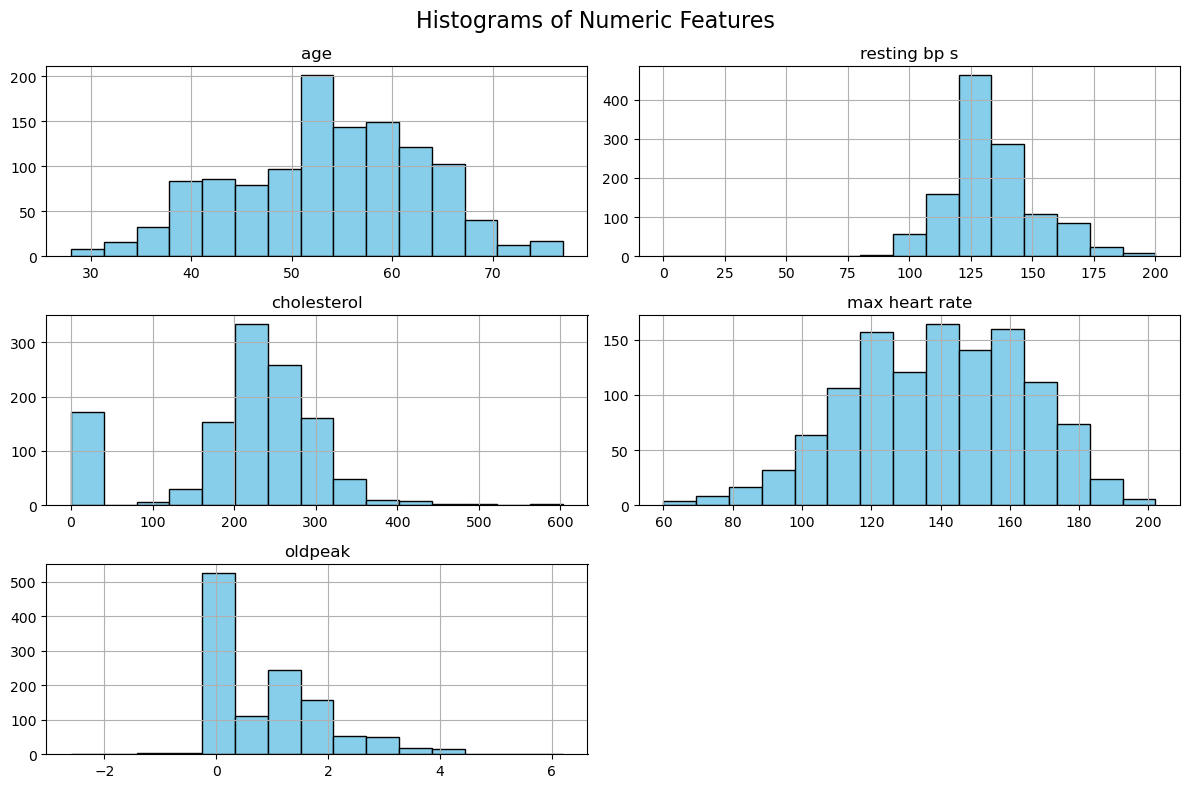

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for duplicates
duplicates = heart_disease_data.duplicated().sum()

# Check basic statistics for identifying outliers
statistics_summary = heart_disease_data.describe()

# Plot histograms for numeric features
numeric_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
heart_disease_data[numeric_columns].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()

# Return findings
duplicates, statistics_summary

Dataset Observations:

1. **Duplicates**: The dataset contains no duplicates.
   
2. **Statistics Summary**:
   
   - Some columns (e.g., "resting bp s" and "cholesterol") have a minimum value of 0, which might not make sense medically and could be outliers.
 
   - "Oldpeak" has negative values, which may also need investigation.

### Detailed outlier analysis and correlation heatmap visualization

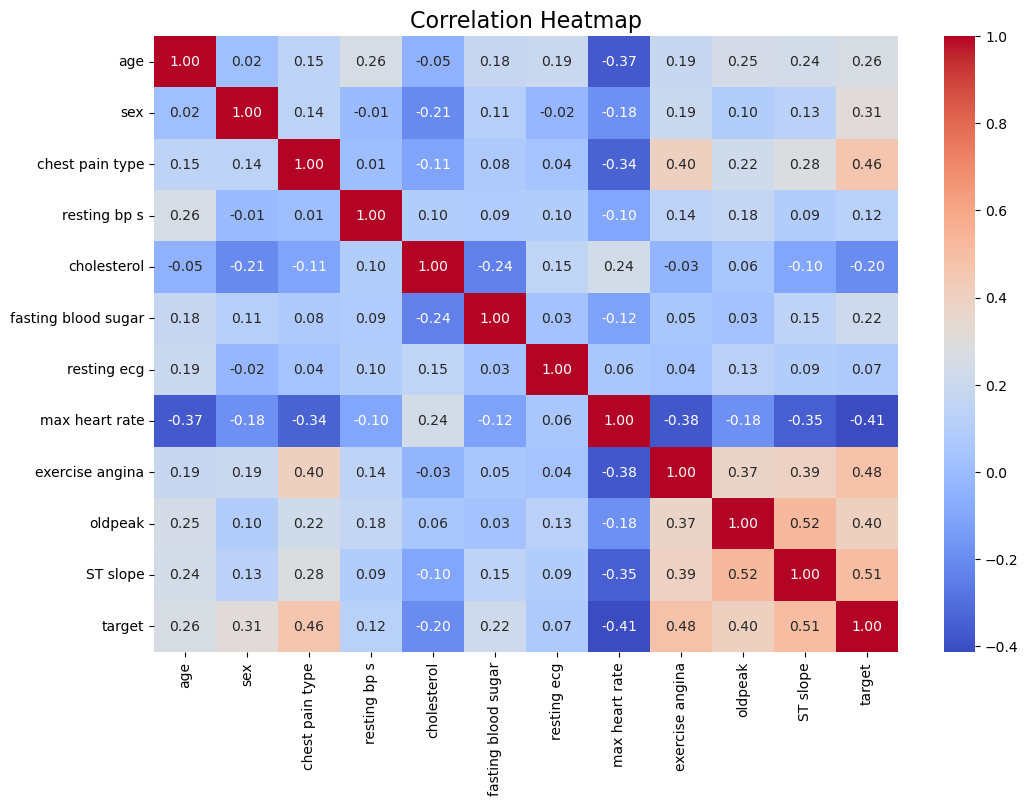

,resting bp s,cholesterol,oldpeak
count,1190.000000,1190.000000,1190.000000
mean,132.153782,210.363866,0.922773
std,18.368823,101.420489,1.086337
min,0.000000,0.000000,-2.600000
25%,120.000000,188.000000,0.000000
50%,130.000000,229.000000,0.600000
75%,140.000000,269.750000,1.600000
max,200.000000,603.000000,6.200000


In [5]:
# Identifying outliers in specific columns
outlier_columns = ['resting bp s', 'cholesterol', 'oldpeak']
outlier_stats = heart_disease_data[outlier_columns].describe()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = heart_disease_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

outlier_stats


### Observations from Outlier Analysis:
1. **Resting Blood Pressure (resting bp s)**:
   - Minimum value is 0, which is invalid.
2. **Cholesterol**:
   - Minimum value is 0, which is unlikely for a healthy individual.
3. **Oldpeak**:
   - Contains negative values, which should be checked as they may not be valid.

### Correlation Analysis:
- Strong correlations observed:
  - **Chest Pain Type** (chest pain type) has a significant negative correlation with the target.
  - **Oldpeak** and **ST slope** are moderately correlated with the target.
- Weak correlations between most numeric features and the target, highlighting the need for careful feature engineering.


### Feature visualization

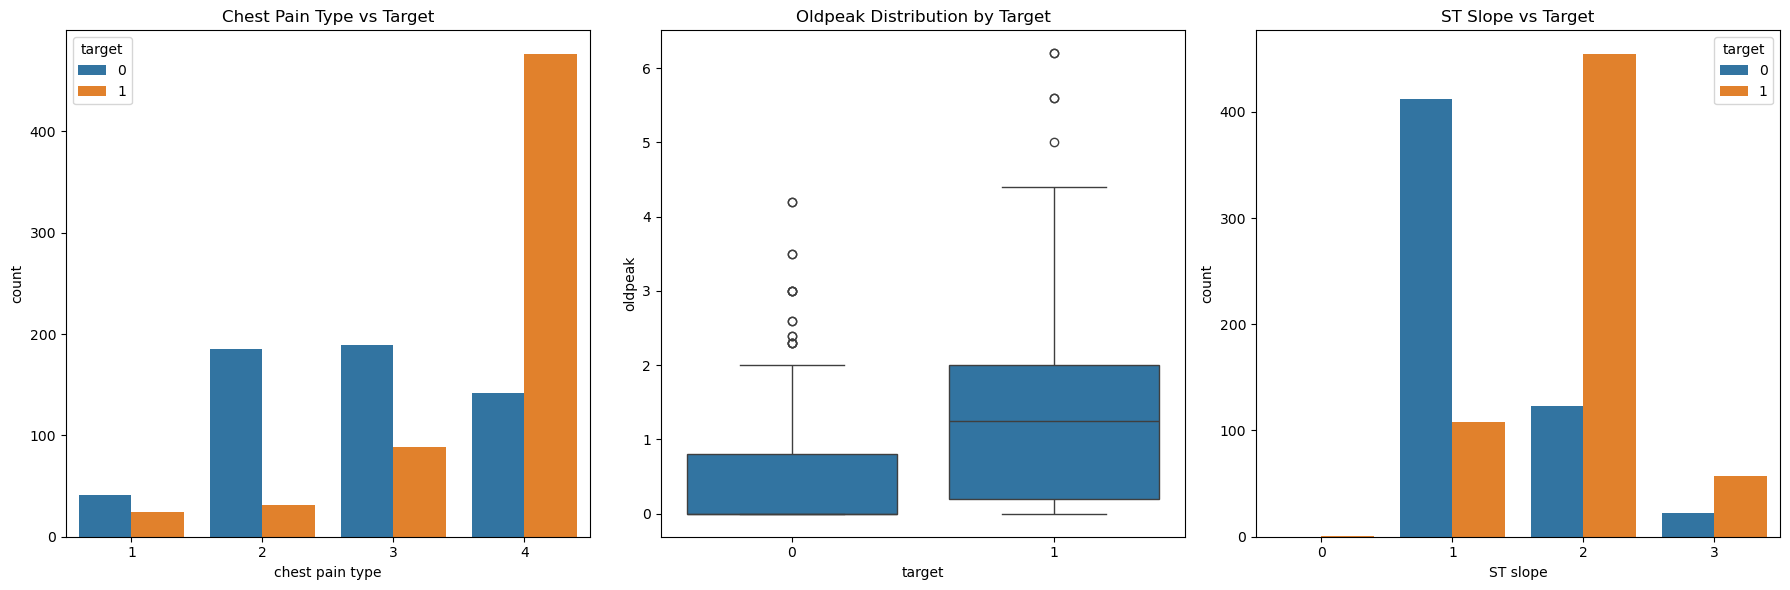

,resting bp s,cholesterol,oldpeak
count,1177.000000,1177.000000,1177.000000
mean,132.463891,245.175871,0.943840
std,17.931055,53.216256,1.071142
min,80.000000,85.000000,0.000000
25%,120.000000,214.000000,0.000000
50%,130.000000,240.000000,0.600000
75%,140.000000,270.000000,1.600000
max,200.000000,603.000000,6.200000


In [6]:
# Handle invalid values
# Replace zeros in 'resting bp s' and 'cholesterol' with their respective medians (ignoring zeros during computation)
heart_disease_data['resting bp s'] = heart_disease_data['resting bp s'].replace(0, heart_disease_data['resting bp s'][heart_disease_data['resting bp s'] > 0].median())
heart_disease_data['cholesterol'] = heart_disease_data['cholesterol'].replace(0, heart_disease_data['cholesterol'][heart_disease_data['cholesterol'] > 0].median())

# Remove negative values in 'oldpeak'
heart_disease_data = heart_disease_data[heart_disease_data['oldpeak'] >= 0]

# Recheck statistics for these columns after cleaning
cleaned_statistics = heart_disease_data[['resting bp s', 'cholesterol', 'oldpeak']].describe()

# Visualize 'chest pain type', 'oldpeak', and 'ST slope' against the target
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=heart_disease_data, x='chest pain type', hue='target', ax=axs[0])
axs[0].set_title("Chest Pain Type vs Target")

sns.boxplot(data=heart_disease_data, x='target', y='oldpeak', ax=axs[1])
axs[1].set_title("Oldpeak Distribution by Target")

sns.countplot(data=heart_disease_data, x='ST slope', hue='target', ax=axs[2])
axs[2].set_title("ST Slope vs Target")

plt.tight_layout()
plt.show()

cleaned_statistics

## Model Creation and Evaluation

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, RMSprop
import joblib

In [8]:
# Split dataset into features and target
X = heart_disease_data.drop(columns=['target'])
y = heart_disease_data['target']

In [14]:
X.columns.tolist()

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope']

In [10]:
# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#### Helper functions

In [34]:
def plot_confusion_matrix(cm, title, ax):
    """Plot confusion matrix using seaborn heatmap."""
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

In [35]:
def evaluate_neural_net(model, X_test, y_test):
    """Evaluate neural network and return metrics."""
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

In [36]:
def evaluate_model(model, X_test, y_test, is_neural_net=False):
    """Evaluate the model and return metrics."""
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm


#### 1. Logistic Regression

In [37]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_metrics = evaluate_model(log_reg, X_test, y_test)

#### 2. Random Forest

In [38]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_clf, X_test, y_test)

#### 3. Neural Network (L1 Regularization + Adam Optimizer)

In [41]:
nn_l1 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])
nn_l1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
nn_l1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
nn_l1_metrics = evaluate_neural_net(nn_l1, X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


#### 4. Neural Network (L2 Regularization + RMSProp Optimizer)

In [42]:
nn_l2 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])
nn_l2.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
nn_l2.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
nn_l2_metrics = evaluate_neural_net(nn_l2, X_test, y_test)

c:\Users\MaximeGuy\.conda\envs\runpython_3.12\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


#### Create confusion matrix plots


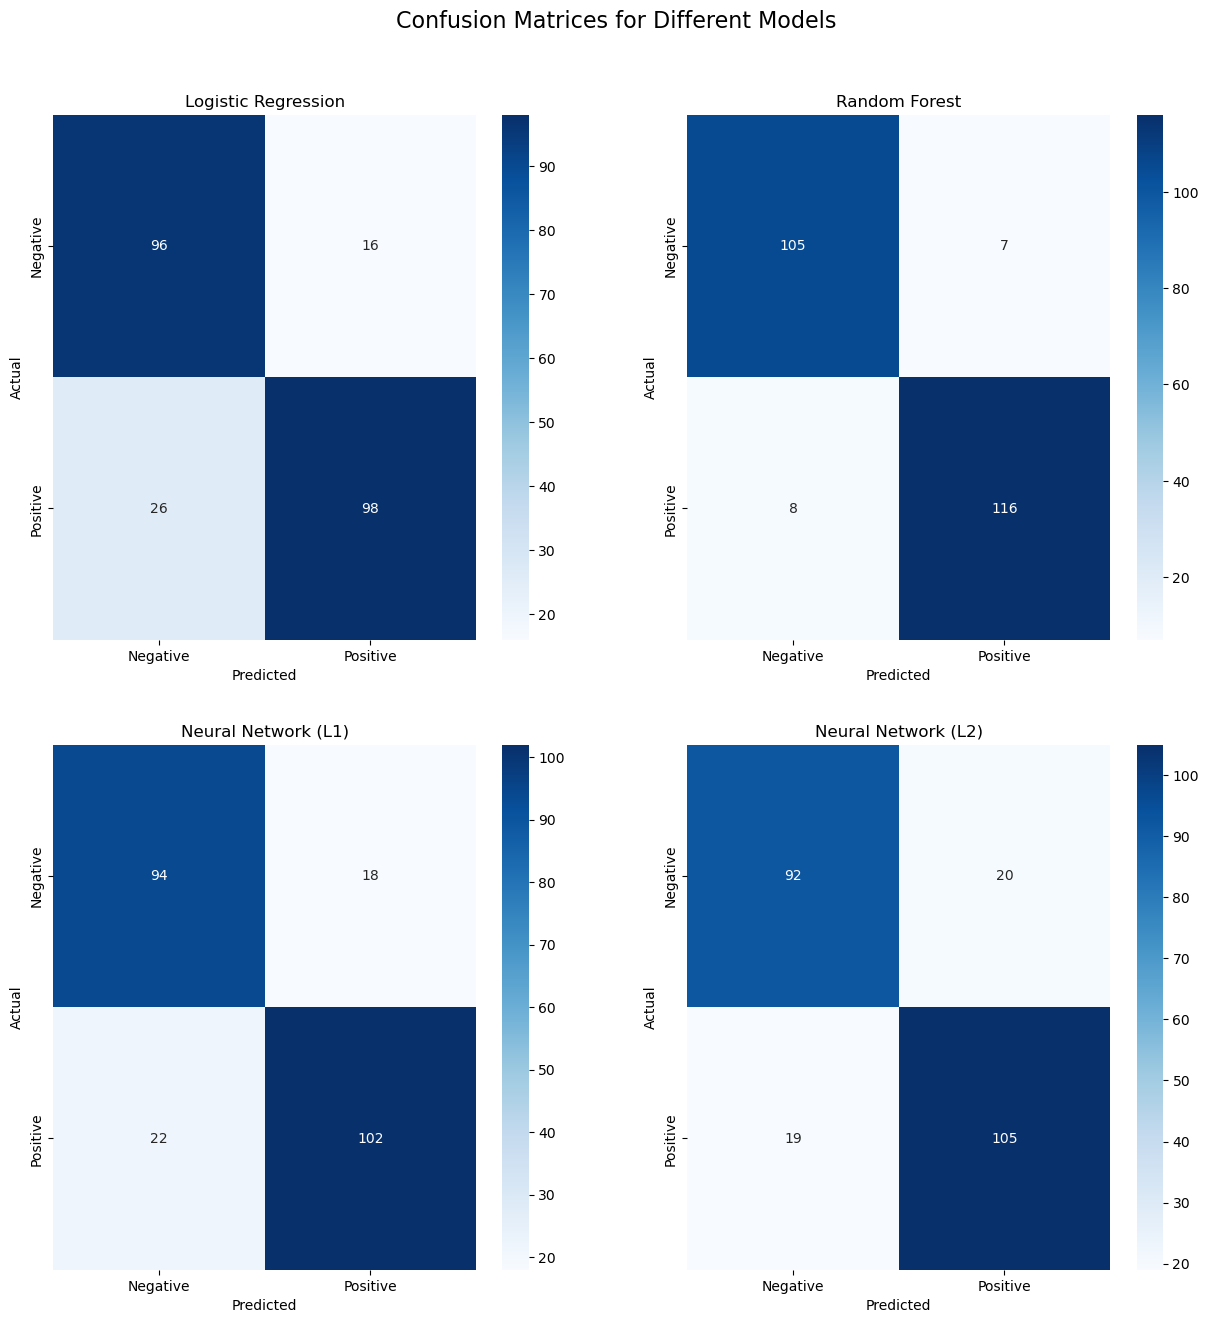

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16, y=0.95)

# Plot confusion matrices
plot_confusion_matrix(log_reg_metrics[4], 'Logistic Regression', axes[0, 0])
plot_confusion_matrix(rf_metrics[4], 'Random Forest', axes[0, 1])
plot_confusion_matrix(nn_l1_metrics[4], 'Neural Network (L1)', axes[1, 0])
plot_confusion_matrix(nn_l2_metrics[4], 'Neural Network (L2)', axes[1, 1])

plt.show()

#### Print detailed metrics

In [45]:
models = {
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rf_metrics,
    'Neural Network (L1)': nn_l1_metrics,
    'Neural Network (L2)': nn_l2_metrics
}

print("\nDetailed Model Performance Metrics:")
print("-" * 50)
for model_name, metrics in models.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics[0]:.3f}")
    print(f"Precision: {metrics[1]:.3f}")
    print(f"Recall: {metrics[2]:.3f}")
    print(f"F1 Score: {metrics[3]:.3f}")
    print("\nConfusion Matrix:")
    print(metrics[4])
    print("-" * 50)




Detailed Model Performance Metrics:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.822
Precision: 0.860
Recall: 0.790
F1 Score: 0.824

Confusion Matrix:
[[96 16]
 [26 98]]
--------------------------------------------------

Random Forest:
Accuracy: 0.936
Precision: 0.943
Recall: 0.935
F1 Score: 0.939

Confusion Matrix:
[[105   7]
 [  8 116]]
--------------------------------------------------

Neural Network (L1):
Accuracy: 0.831
Precision: 0.850
Recall: 0.823
F1 Score: 0.836

Confusion Matrix:
[[ 94  18]
 [ 22 102]]
--------------------------------------------------

Neural Network (L2):
Accuracy: 0.835
Precision: 0.840
Recall: 0.847
F1 Score: 0.843

Confusion Matrix:
[[ 92  20]
 [ 19 105]]
--------------------------------------------------


#### Find and save the best model

In [46]:
# Find and save the best model
models_and_metrics = {
    'Logistic Regression': (log_reg, log_reg_metrics[0]),
    'Random Forest': (rf_clf, rf_metrics[0]),
    'Neural Network L1': (nn_l1, nn_l1_metrics[0]),
    'Neural Network L2': (nn_l2, nn_l2_metrics[0])
}

best_model_name = max(models_and_metrics, key=lambda x: models_and_metrics[x][1])
best_model = models_and_metrics[best_model_name][0]

print(f"\nBest Model: {best_model_name}")
print(f"Best Model Accuracy: {models_and_metrics[best_model_name][1]:.3f}")


Best Model: Random Forest
Best Model Accuracy: 0.936


### Save the best model

In [47]:
if best_model_name.startswith('Neural Network'):
    best_model.save('../models/best_model.tf')
    joblib.dump(best_model, '../models/best_model.pkl')
else:
    joblib.dump(best_model, '../models/best_model.pkl')

# Save the scaler for future use
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']